# Spam Detector: SMS

## The Data
Get the SMS data here: [link to Kaggle SMS Spam Collection Dataset](https://www.kaggle.com/uciml/sms-spam-collection-dataset) Note: you need to log in to kaggle to download the content.

### description
The files contain one message per line. Each line is composed by two columns: v1 contains the label (ham or spam) and v2 contains the raw text. 

### Context

The SMS Spam Collection is a set of SMS tagged messages that have been collected for SMS Spam research. It contains one set of SMS messages in English of 5,574 messages, tagged acording being ham (legitimate) or spam.

### Content

The files contain one message per line. Each line is composed by two columns: v1 contains the label (ham or spam) and v2 contains the raw text.

This corpus has been collected from free or free for research sources at the Internet:

* A collection of 425 SMS spam messages was manually extracted from the Grumbletext Web site. This is a UK forum in which cell phone users make public claims about SMS spam messages, most of them without reporting the very spam message received. The identification of the text of spam messages in the claims is a very hard and time-consuming task, and it involved carefully scanning hundreds of web pages. The Grumbletext Web site is: [http://www.grumbletext.co.uk/].  
* A subset of 3,375 SMS randomly chosen ham messages of the NUS SMS Corpus (NSC), which is a dataset of about 10,000 legitimate messages collected for research at the Department of Computer Science at the National University of Singapore. The messages largely originate from Singaporeans and mostly from students attending the University. These messages were collected from volunteers who were made aware that their contributions were going to be made publicly available. The NUS SMS Corpus is avalaible at: [http://www.comp.nus.edu.sg/~rpnlpir/downloads/corpora/smsCorpus/]. 
* A list of 450 SMS ham messages collected from Caroline Tag's PhD Thesis available at [http://etheses.bham.ac.uk/253/1/Tagg09PhD.pdf]. 
* Finally, we have incorporated the SMS Spam Corpus v.0.1 Big. It has 1,002 SMS ham messages and 322 spam messages and it is public available at: [http://www.esp.uem.es/jmgomez/smsspamcorpus/]. 

### Acknowledgements

The original dataset can be found here. The creators would like to note that in case you find the dataset useful, please make a reference to previous paper and the web page: http://www.dt.fee.unicamp.br/~tiago/smsspamcollection/ in your papers, research, etc.

We offer a comprehensive study of this corpus in the following paper. This work presents a number of statistics, studies and baseline results for several machine learning methods.

Almeida, T.A., GÃ³mez Hidalgo, J.M., Yamakami, A. Contributions to the Study of SMS Spam Filtering: New Collection and Results. Proceedings of the 2011 ACM Symposium on Document Engineering (DOCENG'11), Mountain View, CA, USA, 2011.
### Inspiration

***Can you use this dataset to build a prediction model that will accurately classify which texts are spam?***


## import the data

In [86]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.feature_extraction.text import TfidfVectorizer, CountVectorizer
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import MultinomialNB
from sklearn.svm import SVC
from wordcloud import WordCloud

In [87]:
# get the data, note it is nto in utf-8. 
# I did not catch this at first and just googled a possible solution
sms_data = pd.read_csv('data/spam.csv', encoding='iso-8859-1"')

## Start processing the data: munging and feature extraction

In [88]:
# These unnamed colomns are not necessary.
sms_data

,v1,v2,Unnamed: 2,Unnamed: 3,Unnamed: 4
0,ham,"Go until jurong point, crazy.. Available only ...",NaN,NaN,NaN
1,ham,Ok lar... Joking wif u oni...,NaN,NaN,NaN
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,NaN,NaN,NaN
3,ham,U dun say so early hor... U c already then say...,NaN,NaN,NaN
4,ham,"Nah I don't think he goes to usf, he lives aro...",NaN,NaN,NaN
5,spam,FreeMsg Hey there darling it's been 3 week's n...,NaN,NaN,NaN
6,ham,Even my brother is not like to speak with me. ...,NaN,NaN,NaN
7,ham,As per your request 'Melle Melle (Oru Minnamin...,NaN,NaN,NaN
8,spam,WINNER!! As a valued network customer you have...,NaN,NaN,NaN
9,spam,Had your mobile 11 months or more? U R entitle...,NaN,NaN,NaN


In [89]:
sms_data['Unnamed: 2'].value_counts()

 bt not his girlfrnd... G o o d n i g h t . . .@"                                                                                                   3
 but dont try to prove it..\" .Gud noon...."                                                                                                        2
 don't miss ur best life for anything... Gud nyt..."                                                                                                2
 PO Box 5249                                                                                                                                        2
this wont even start........ Datz confidence.."                                                                                                     2
GN                                                                                                                                                  2
 always give response 2 who cares 4 U\"... Gud night..swt dreams..take care"                        

In [90]:
# remove the unecessary columns 
sms_data.drop(['Unnamed: 2','Unnamed: 3','Unnamed: 4'], axis=1, inplace=True)

In [91]:
sms_data.columns = ['labels','data']

In [92]:
sms_data.head()

,labels,data
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."


### move the spam label into 1/0, yes/no format

In [93]:
from sklearn import preprocessing
le = preprocessing.LabelEncoder()
le.fit(sms_data['labels'])
le.classes_
sms_data['labels'] = le.transform(sms_data['labels'])

In [94]:
 le.classes_

array(['ham', 'spam'], dtype=object)

Another way to do this is to use the line of code below. The point is not that one way is right or one way is wrong. They both produce the same reuslts. The point is to see that there are many different ways to do things in Python. It is for you to decide what is the best way.

In [95]:
# less code in this way but it also adds a new column 
# sms_data['b_labels'] = sms_data['labels'].map({'ham':0,'spam':1})

In [96]:
sms_data

,labels,data
0,0,"Go until jurong point, crazy.. Available only ..."
1,0,Ok lar... Joking wif u oni...
2,1,Free entry in 2 a wkly comp to win FA Cup fina...
3,0,U dun say so early hor... U c already then say...
4,0,"Nah I don't think he goes to usf, he lives aro..."
5,1,FreeMsg Hey there darling it's been 3 week's n...
6,0,Even my brother is not like to speak with me. ...
7,0,As per your request 'Melle Melle (Oru Minnamin...
8,1,WINNER!! As a valued network customer you have...
9,1,Had your mobile 11 months or more? U R entitle...


In [97]:
sms_data.head()

,labels,data
0,0,"Go until jurong point, crazy.. Available only ..."
1,0,Ok lar... Joking wif u oni...
2,1,Free entry in 2 a wkly comp to win FA Cup fina...
3,0,U dun say so early hor... U c already then say...
4,0,"Nah I don't think he goes to usf, he lives aro..."


### Pull the labels (the target values, the output) out into its own array.

In [98]:
Y = np.ravel(sms_data['labels'])

And yet another method

In [99]:
# Y = sms_data['b_labels'].values
Y

array([0, 0, 1, ..., 0, 0, 0])

### Feature Extraction

You could try different methods here as well.

#### TFIDF Vectorizer

In [101]:
# used TfidfVectorizer to get Tfidf values for words
# vectorizer = TfidfVectorizer()
# X = vectorizer.fit_transform(sms_data['sms'])

#### Count Vectorier (basic word count)

In [102]:
# Used a "bag of words" approach by creating a smple word count.
count_vectorizer = CountVectorizer(decode_error='ignore')
X = count_vectorizer.fit_transform(sms_data['data'])
print(X)

  (0, 8267)	1
  (0, 1069)	1
  (0, 3594)	1
  (0, 7645)	1
  (0, 2048)	1
  (0, 1749)	1
  (0, 4476)	1
  (0, 8489)	1
  (0, 3634)	1
  (0, 1751)	1
  (0, 4087)	1
  (0, 5537)	1
  (0, 1303)	1
  (0, 2327)	1
  (0, 5920)	1
  (0, 4350)	1
  (0, 8030)	1
  (0, 3550)	1
  (1, 5533)	1
  (1, 8392)	1
  (1, 4318)	1
  (1, 4512)	1
  (1, 5504)	1
  (2, 77)	1
  (2, 1156)	1
  :	:
  (5570, 1786)	1
  (5570, 3470)	1
  (5570, 2892)	1
  (5570, 7049)	1
  (5570, 1778)	1
  (5570, 8065)	1
  (5570, 2592)	1
  (5570, 5334)	1
  (5570, 1438)	1
  (5570, 7627)	1
  (5570, 3308)	1
  (5570, 7039)	1
  (5570, 4615)	1
  (5570, 1084)	1
  (5570, 8313)	1
  (5570, 4218)	1
  (5570, 3781)	1
  (5570, 7756)	1
  (5570, 3358)	1
  (5570, 4087)	1
  (5571, 6505)	1
  (5571, 7885)	1
  (5571, 4225)	2
  (5571, 5244)	1
  (5571, 7756)	1


### Split the data for train and test sets

#### the old fasioned way

In [103]:
# X_train = X[:-1500,]
# Y_train = Y[:-1500,]
# x_test = X[-1500:,]
# y_test = Y[-1500:,]

#### Another way using built in method of scikit learn (train_test_split)

In [104]:
Xtrain, Xtest, Ytrain, Ytest = train_test_split(X, Y, test_size=0.33)

### instantiate a model

In [105]:

model = MultinomialNB()
model.fit(Xtrain,Ytrain)
print("train score:", model.score(Xtrain, Ytrain))
print("test score:", model.score(Xtest, Ytest))
# better than my td-idf features

train score: 0.993838735601393
test score: 0.9847743338771071


## Visualization of the Data
We can visualize the raw data in a word clad for the spam SMS and again for the non-spam SMS.

0


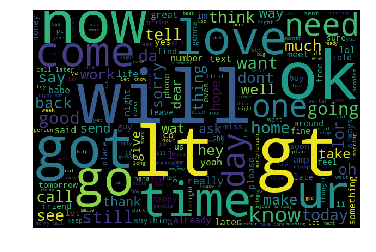

1


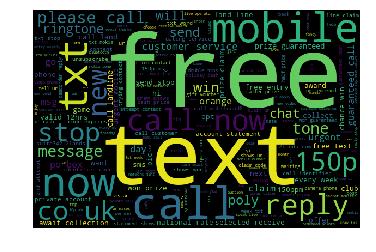

In [106]:
def visualize(label,df):
    print(label)
    words = ''
    for msg in df[df['labels'] == label]['data']:
        msg = msg.lower()
        words += msg + ' '
    wordcloud = WordCloud(width=600, height=400).generate(words)
    plt.imshow(wordcloud)
    plt.axis('off')
    plt.show()

visualize(0,sms_data)
visualize(1,sms_data)

We can see that the is not much overlap between the word counts

## Examine the errors

We can take a look at the errors and see the messages that our model predicted would be ham but were in fact spam

In [107]:
# see what we're getting wrong
sms_data['predictions'] = model.predict(X)

In [109]:
# things that should be spam
sneaky_spam = sms_data[(sms_data['predictions'] == 0) & (sms_data['labels'] == 1)]['data']
for msg in sneaky_spam:
    print(msg)

FreeMsg Hey there darling it's been 3 week's now and no word back! I'd like some fun you up for it still? Tb ok! XxX std chgs to send, å£1.50 to rcv
Did you hear about the new \Divorce Barbie\"? It comes with all of Ken's stuff!"
SMS. ac sun0819 posts HELLO:\You seem cool
Do you realize that in about 40 years, we'll have thousands of old ladies running around with tattoos?
Talk sexy!! Make new friends or fall in love in the worlds most discreet text dating service. Just text VIP to 83110 and see who you could meet.
Hello. We need some posh birds and chaps to user trial prods for champneys. Can i put you down? I need your address and dob asap. Ta r
Can U get 2 phone NOW? I wanna chat 2 set up meet Call me NOW on 09096102316 U can cum here 2moro Luv JANE xx Callså£1/minmoremobsEMSPOBox45PO139WA
For sale - arsenal dartboard. Good condition but no doubles or trebles!
0A$NETWORKS allow companies to bill for SMS, so they are responsible for their \suppliers\"
Would you like to see my XXX pic

We can also look at the messages our model predicted were spam but were actually legitamate messages

In [110]:
# things that should not be spam
not_actually_spam = sms_data[(sms_data['predictions'] == 1) & (sms_data['labels'] == 0)]['data']
for msg in not_actually_spam:
  print(msg)


Finally the match heading towards draw as your prediction.
Hey company elama po mudyadhu.
Waiting for your call.
Nutter. Cutter. Ctter. Cttergg. Cttargg. Ctargg. Ctagg. ie you
We have sent JD for Customer Service cum Accounts Executive to ur mail id, For details contact us
Hey...Great deal...Farm tour 9am to 5pm $95/pax, $50 deposit by 16 May
S..antha num corrct dane
V-aluable. A-ffectionate. L-oveable. E-ternal. N-oble. T-ruthful. I-ntimate. N-atural. E-namous. Happy \VALENTINES DAY\" in advance"
I know complain num only..bettr directly go to bsnl offc nd apply for it..
staff.science.nus.edu.sg/~phyhcmk/teaching/pc1323
Unlimited texts. Limited minutes.
I sent lanre fakeye's Eckankar details to the mail box
Mathews or tait or edwards or anderson
Gettin rdy to ship comp
I liked the new mobile
I (Career Tel) have added u as a contact on INDYAROCKS.COM to send FREE SMS. To remove from phonebook - sms NO to  &lt;#&gt;
Nokia phone is lovly..
We have sent JD for Customer Service cum Accounts